# Deep Feed Forward Neural Networks

### Step 1 - Import libraries

In [7]:
# Tensorflow / Keras
import tensorflow as tf # used to access argmax function
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.metrics import classification_report # for model evaluation metrics

# Visualization
import matplotlib 
import matplotlib.pyplot as plt # for showing handwritten digits
print('matplotlib: %s' % matplotlib.__version__) # print version

Tensorflow/Keras: 2.7.0
pandas: 1.3.4
numpy: 1.21.4
sklearn: 1.0.1
matplotlib: 3.5.1


### Step 2 - Load MNIST digit data

Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


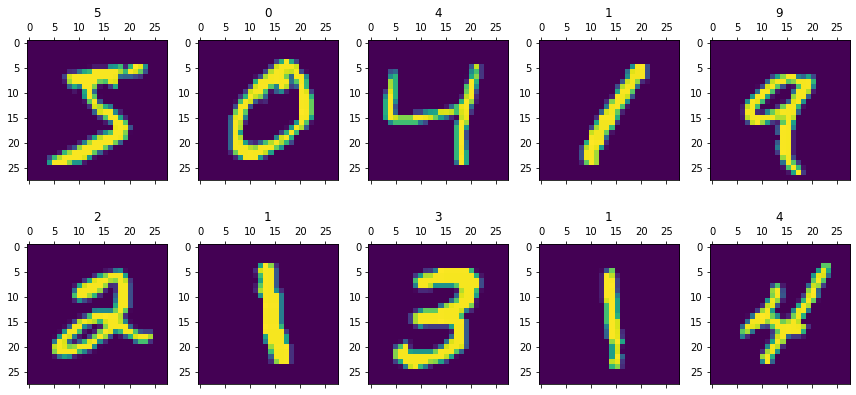

In [2]:
# Load digits data 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Display images of the first 10 digits in the training set and their true lables
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train[n])
        axs[i,j].set(title=y_train[n])
        n=n+1
plt.show() 

In [12]:
# Pixel values range from 0 to 255.
# Hence, will need to normalize when reshaping by dividing by 255
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
# Reshape and normalize (divide by 255) input data
X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

# Print shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)


### Step 3 - Train a Deep Feed Forward Neural Network

In [5]:
##### Step 1 - Specify the structure of a Neural Network
model = Sequential(name="DFF-Model") # Model
model.add(Input(shape=(784,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Dense(128, activation='relu', name='Hidden-Layer-1', kernel_initializer='HeNormal')) # Hidden Layer, relu(x) = max(x, 0)
model.add(Dense(64, activation='relu', name='Hidden-Layer-2', kernel_initializer='HeNormal')) # Hidden Layer, relu(x) = max(x, 0)
model.add(Dense(32, activation='relu', name='Hidden-Layer-3', kernel_initializer='HeNormal')) # Hidden Layer, relu(x) = max(x, 0)
model.add(Dense(10, activation='softmax', name='Output-Layer')) # Output Layer, softmax(x) = exp(x) / tf.reduce_sum(exp(x))

##### Step 2 - Compile keras model
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='SparseCategoricalCrossentropy', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['Accuracy'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )


##### Step 3 - Fit keras model on the dataset
model.fit(X_train, # input data
          y_train, # target data
          batch_size=10, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=5, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
          verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
          #callbacks=[tb], # default=None, list of callbacks to apply during training. See tf.keras.callbacks
          callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
          validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
          #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
          sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
          initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
          steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
          validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
          validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
          validation_freq=5, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
          max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
          workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
          use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
         )


##### Step 4 - Use model to make predictions
# Note, we need to pass model output through argmax to convert from probability to label
# Also, we convert output from tensor to numpy array
# Predict class labels on training data
pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train),axis=1))
# Predict class labels on a test data
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test),axis=1))


##### Step 5 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model.summary() # print model summary
print("")

# I an not printing the parameters since my Deep Feed Forward Neural Network contains more than 100K of them
#print('-------------------- Weights and Biases --------------------')
#for layer in model_d1.layers:
    #print("Layer: ", layer.name) # print layer name
    #print("  --Kernels (Weights): ", layer.get_weights()[0]) # kernels (weights)
    #print("  --Biases: ", layer.get_weights()[1]) # biases
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_train, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

Epoch 1/5
4800/4800 [==============================] - 6s 1ms/step - loss: 0.2357 - Accuracy: 0.9292
Epoch 2/5
4800/4800 [==============================] - 6s 1ms/step - loss: 0.1123 - Accuracy: 0.9651
Epoch 3/5
4800/4800 [==============================] - 6s 1ms/step - loss: 0.0837 - Accuracy: 0.9744
Epoch 4/5
4800/4800 [==============================] - 6s 1ms/step - loss: 0.0678 - Accuracy: 0.9781
Epoch 5/5
4800/4800 [==============================] - 7s 1ms/step - loss: 0.0543 - Accuracy: 0.9833 - val_loss: 0.1237 - val_Accuracy: 0.9695

-------------------- Model Summary --------------------
Model: "DFF-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               100480    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                8256      
                                               

---

# End of Program